# Eye blinking prediction

## 1. Problem Description

> Eye state detection is the task of predicting the state of eye whether it is open or closed. To achieve this task, a new trend of using brain activity signals by the mean of electroencephalography (EEG) measures for the training and testing of various machine learning classification algorithms was investigated by many researchers.

> The task of predicting human actions via brain signals takes high importance and usability in various fields such as computer games, health care and bio-medical systems, emotion tracking, smart home device controlling and internet of things, military, and detection of car driving drowsiness.

> An Emotiv headset device with 14 sensors has been used to record brain signals. The duration time of each recording was 117 seconds. Then, the different eye states observed during each recording were manually added. Each data point consists of 14 EEG features and an eye-state class (either 0 for open, or 1 for closed).

> The dataset was created by Rösler and Suendermann, which was firstly used by them in "O. Rösler and D. Suendermann, A first step towards eye state prediction using EEG, Proc. of the AIHLS, 2013"

## 2. Data Overview

In [1]:
%matplotlib inline
import pandas as pd


<img src="./images/header.png" alt="drawing"/>


A multi-channel electroencephalography (EEG) system enables a broad range of applications including neurotherapy, biofeedback, and brain computer interfacing. The dataset you will analyse is created with the [Emotiv EPOC+](https://www.emotiv.com/product/emotiv-epoc-14-channel-mobile-eeg).  

It has 14 EEG channels with names based on the International 10-20 locations: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4:

<br/>
<br/>
<center>
<img src="./images/EEG.png" alt="drawing" width="200"/>
<center/>
<br/>
<br/>


All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. 

The experiment was conducted on one person only. The duration of the measurement was around 117 seconds.

From the paper:

> *The experiment was carried out in a quiet room. During
the experiment, the proband was being videotaped. To prevent
artifacts, the proband was not aware of the exact start time
of the measurement. Instead, he was told to sit relaxed, look
straight to the camera, and change the eye state at free will.
Only additional constraint was that, accumulated over the
entire session, the duration of both eye states should be about
the same and that the individual intervals should vary greatly
in length (from eye blinking to longer stretches)...*

The eye state was detected via a camera during the EEG measurement and later added manually to the file after analyzing the video frames. 

A label '1' indicates the eye-closed and '0' the eye-open state.

(*Source: Oliver Roesler, Stuttgart, Germany*)

Let's load the train and test set:

In [2]:
trainset = pd.read_csv("./data/eeg_train.csv")

In [3]:
trainset.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,label
0,4299.49,3997.44,4277.95,4116.92,4353.85,4623.08,4100.00,4623.59,4202.56,4229.23,4211.79,4278.97,4600.00,4369.23,1
1,4302.05,3985.64,4261.03,4129.74,4334.36,4615.38,4072.31,4585.64,4192.31,4225.13,4195.90,4283.08,4607.18,4358.46,0
2,4321.03,4015.90,4265.13,4122.56,4333.33,4613.33,4072.82,4602.05,4192.31,4223.08,4155.38,4286.15,4608.21,4371.79,0
3,4408.21,4104.10,4380.00,4232.31,4449.74,4750.26,4169.23,4731.28,4311.28,4352.31,4319.49,4388.21,4715.90,4464.10,0
4,4347.18,3975.38,4266.67,4102.56,4333.33,4617.95,4097.44,4612.82,4210.77,4240.51,4248.21,4313.33,4664.10,4411.79,1


<AxesSubplot:>

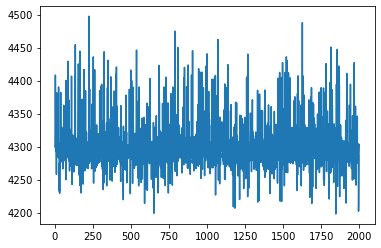

In [159]:
trainset['AF3'].plot()

In [157]:
trainset.shape

(2000, 15)

In [5]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     2000 non-null   float64
 1   F7      2000 non-null   float64
 2   F3      2000 non-null   float64
 3   FC5     2000 non-null   float64
 4   T7      2000 non-null   float64
 5   P7      2000 non-null   float64
 6   O1      2000 non-null   float64
 7   O2      2000 non-null   float64
 8   P8      2000 non-null   float64
 9   T8      2000 non-null   float64
 10  FC6     2000 non-null   float64
 11  F4      2000 non-null   float64
 12  F8      2000 non-null   float64
 13  AF4     2000 non-null   float64
 14  label   2000 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 234.5 KB


In [6]:
trainset.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,label
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4300.157125,4009.273150,4263.860860,4122.616195,4341.606870,4620.061720,4072.151250,4615.229300,4200.893915,4230.573235,4201.583060,4278.445325,4605.169335,4359.852780,0.450500
std,36.361719,29.853264,20.788323,20.565528,16.691038,18.034865,20.933632,18.391027,17.810272,19.661149,24.397269,19.645651,33.067591,37.074555,0.497668
min,4197.950000,3905.640000,4202.560000,4058.460000,4310.260000,4569.740000,4032.820000,4571.280000,4147.690000,4158.970000,4107.180000,4216.410000,4454.360000,4225.640000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.720000,4331.790000,4611.790000,4057.440000,4604.100000,4190.260000,4219.490000,4189.740000,4267.180000,4590.642500,4342.050000,0.000000
50%,4293.330000,4006.150000,4262.560000,4121.030000,4338.460000,4617.950000,4069.740000,4612.820000,4199.490000,4228.720000,4200.000000,4276.410000,4603.080000,4354.360000,0.000000
75%,4309.740000,4023.590000,4270.260000,4133.460000,4347.180000,4626.150000,4083.590000,4623.080000,4209.230000,4238.970000,4211.280000,4286.150000,4617.950000,4371.790000,1.000000
max,4497.440000,4152.820000,4385.640000,4234.360000,4452.820000,4754.870000,4174.870000,4731.280000,4315.380000,4352.310000,4325.640000,4397.950000,4796.920000,4538.970000,1.000000


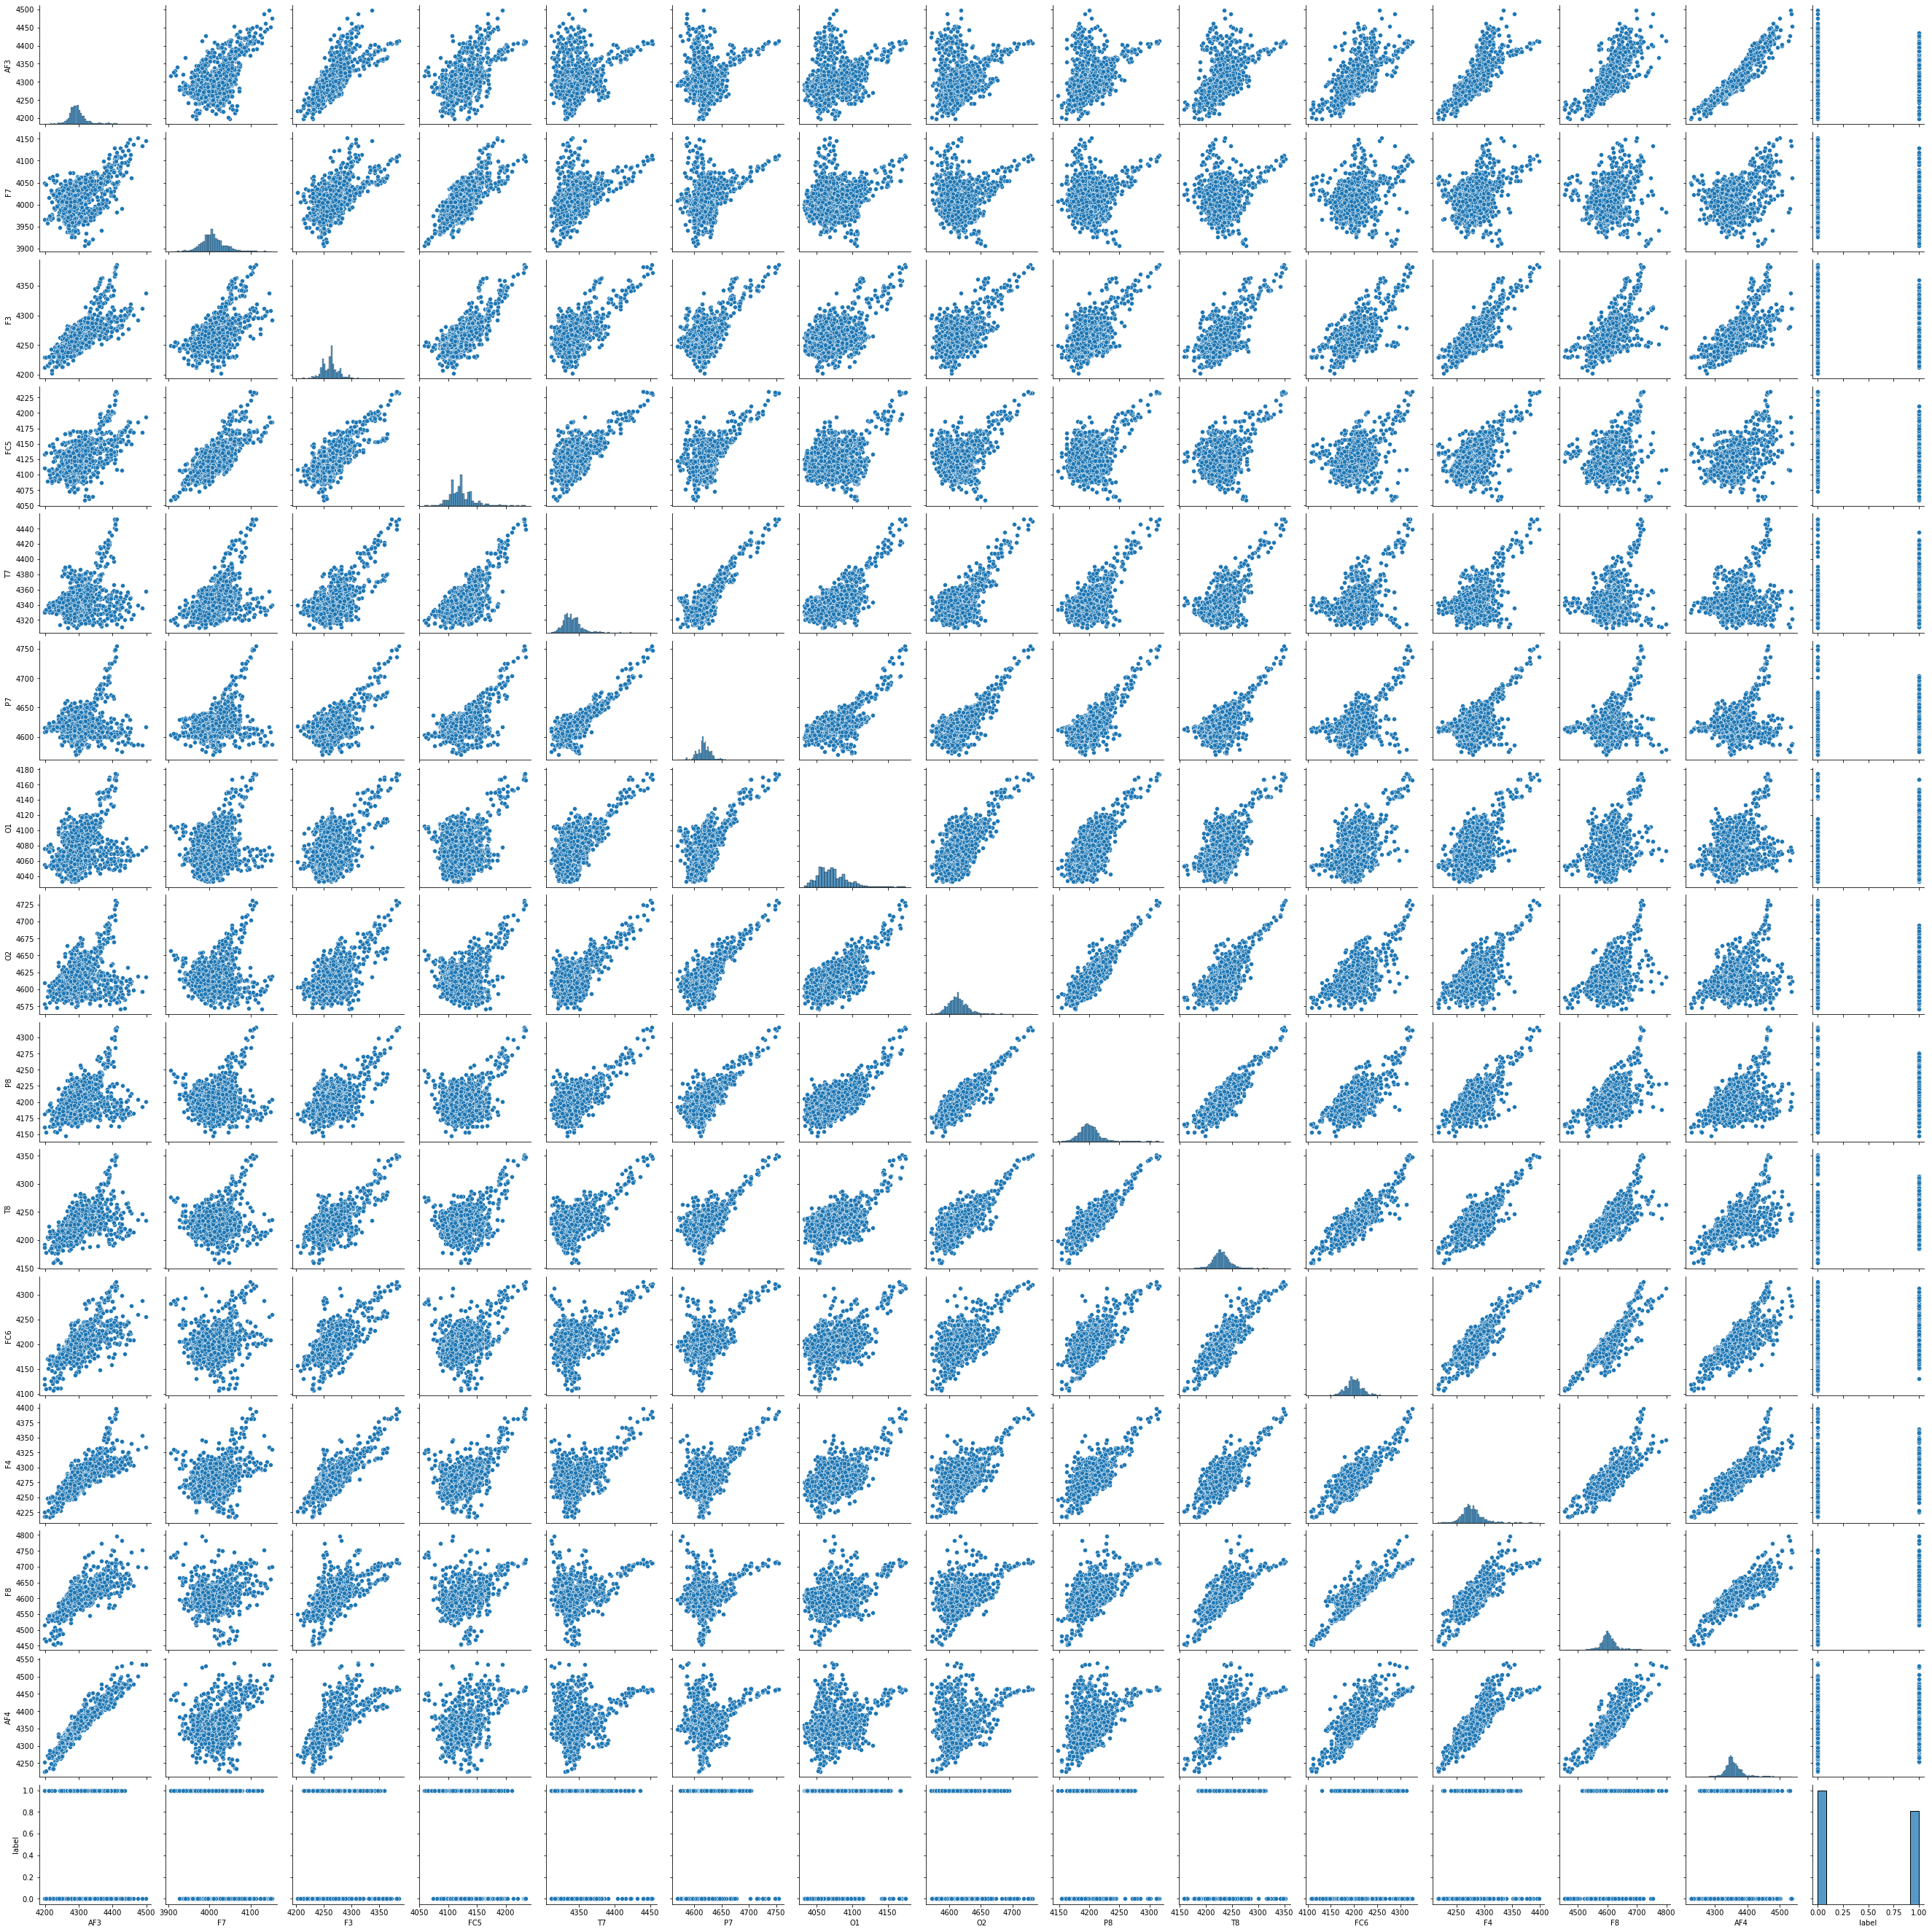

In [7]:
import seaborn as sns
sns.pairplot(trainset)

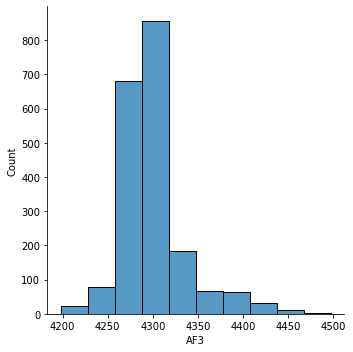

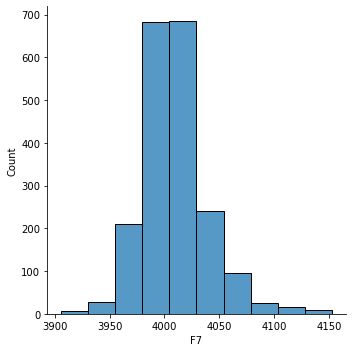

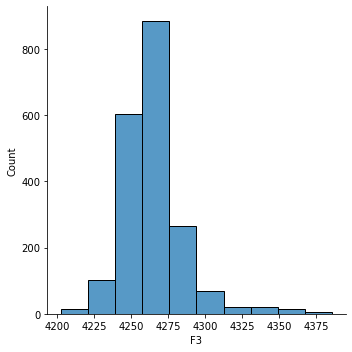

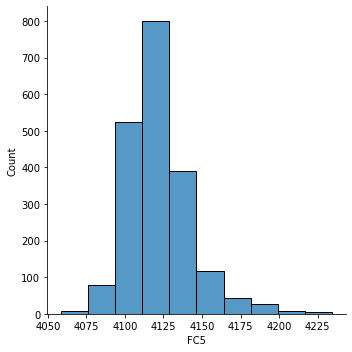

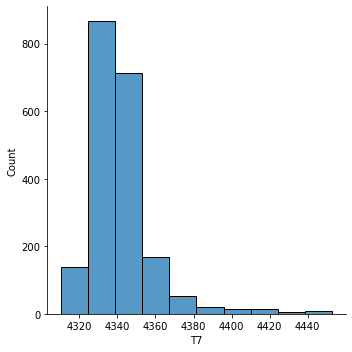

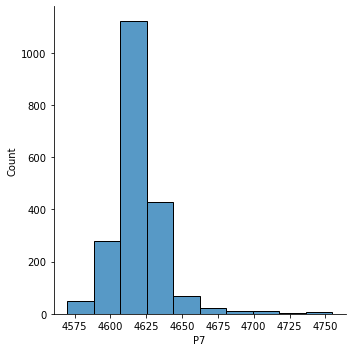

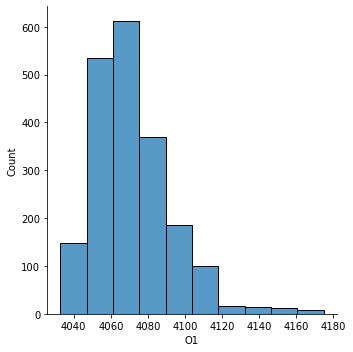

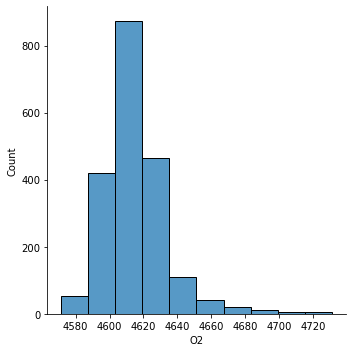

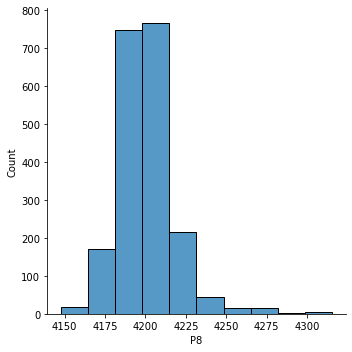

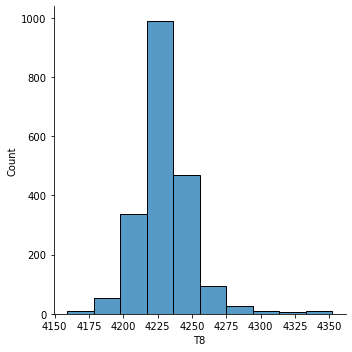

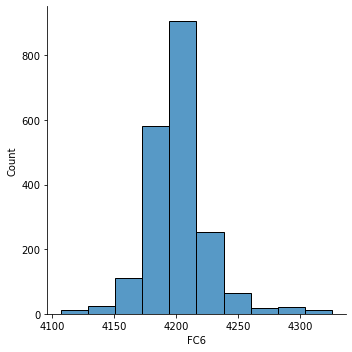

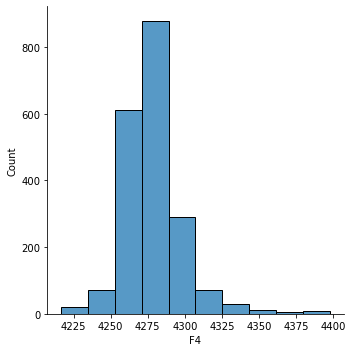

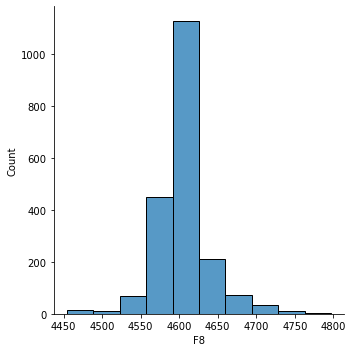

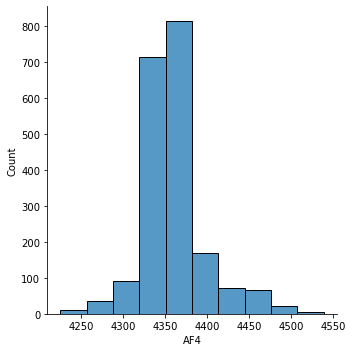

In [8]:
import matplotlib.pyplot as plt

n_rows=1
n_cols=len(trainset.columns)

for column in trainset.columns[:-1]:
    sns.displot(trainset[column], bins=10)

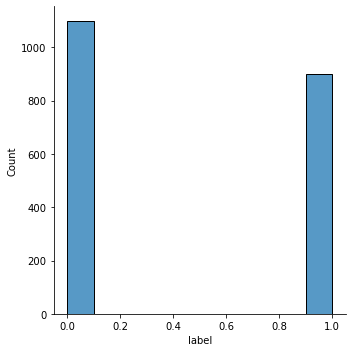

In [9]:
sns.displot(trainset[trainset.columns[-1]], bins=10)

<AxesSubplot:xlabel='label', ylabel='count'>

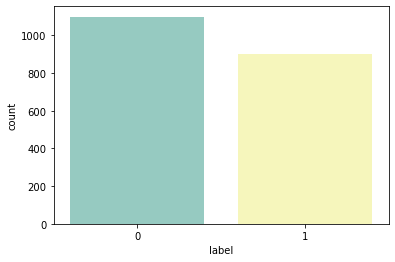

In [24]:
sns.countplot(x='label', data=trainset, palette="Set3")

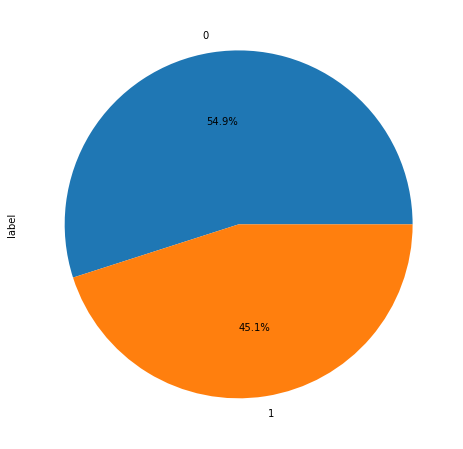

In [14]:
plt.figure(figsize=(8,8))
trainset['label'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

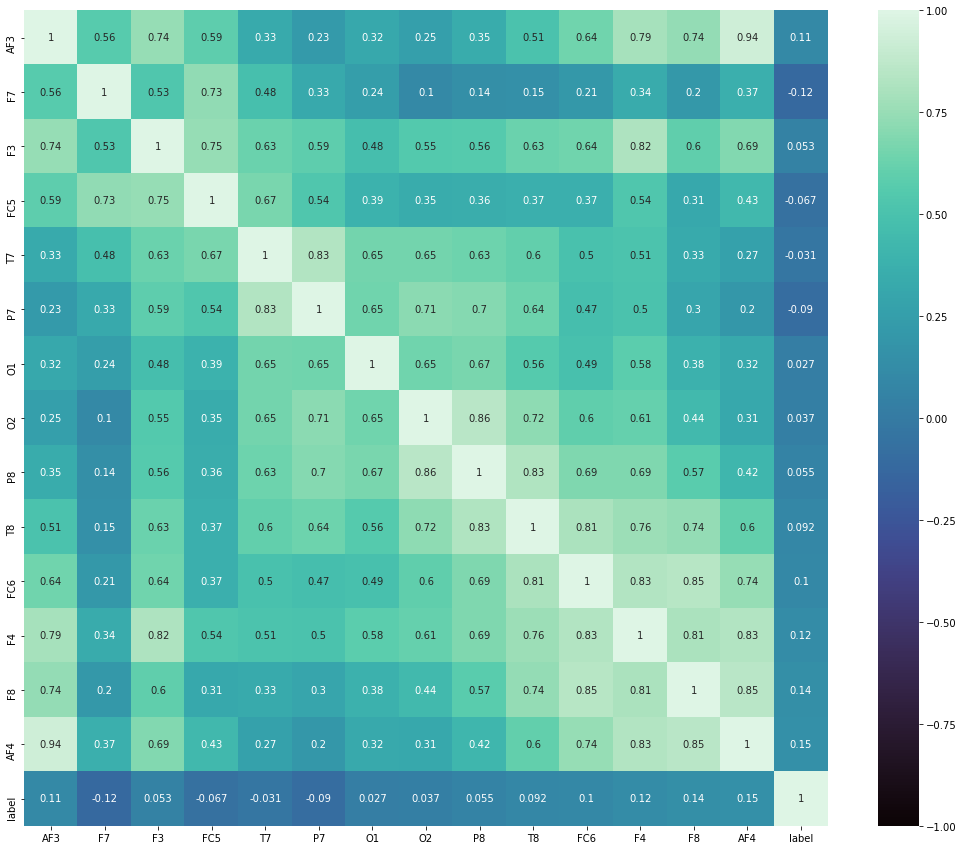

In [25]:
corr=trainset.corr()

plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show

Looking for Nulls:

In [161]:
trainset.isnull().sum()

AF3      0
F7       0
F3       0
FC5      0
T7       0
P7       0
O1       0
O2       0
P8       0
T8       0
FC6      0
F4       0
F8       0
AF4      0
label    0
dtype: int64

In [164]:
trainset.isna().sum()

AF3      0
F7       0
F3       0
FC5      0
T7       0
P7       0
O1       0
O2       0
P8       0
T8       0
FC6      0
F4       0
F8       0
AF4      0
label    0
dtype: int64

In [27]:
print("Missing values:", trainset.isna().sum().sum())

Missing values: 0


Check whether the data is imbalance or not

In [28]:
trainset['label'].value_counts()

0    1099
1     901
Name: label, dtype: int64

Looking if we have non-numeric values or not

In [29]:
print("Non-Numeric columns:", len(trainset.select_dtypes('object').columns))

Non-Numeric columns: 0


## 3. Data Pre-Processing

The only pre-processing required is *scaling* the features. The procedure is as follows:
1. Split the `trainset` into the `train` and `validation` sets.
```python
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(trainset[trainset.columns[:-1]], trainset[trainset.columns[-1]],
                                                  test_size=0.2, random_state=27)
```
2. Fit the scaling function to the `train` set
```python
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=trainset.columns[:-1])
```
3. Transform the fit function to the `validation` set.
```python
X_val = min_max_scaler.transform(X_val)
X_val = pd.DataFrame(X_val, columns=trainset.columns[:-1])
```
> **Note:** To avoid data leakage, we do not use validation in step 2.

Instead, we are using pipeline to simplify the codes. Using the Pipeline, we mix the preprocessing the model creating steps.

**Does my sklearn pipeline also scale my dependent variables y?** 

Suppose my code is
```python
pipe=Pipeline([('sc',StandardScaler()),
               ('pca',PCA(n_components=2)),
               ('lr',LinearRegression())])
```
and I called `pipe.fit(X_train,y_train)`. Does this also scale the `y_train` values?
    
*Answer:* 

No, it does not. `Pipeline` sequentially applies the `fit` method and then the `transform` method to each of the steps, except for the last one, which only needs the `fit` method. Your first two classes in the pipeline are `StandardScaler` and `PCA`, and both of them apply the `fit` method ignoring the `y_train` values, therefore, they only depend on the `X_train` data. For the final step, `LinearRegression` will receive the transformed `X_train` values, and will call the `fit` method with them, but also with the original `y_train` values.

## 4. Building The Model Using Pipeline

### Decision Tree

In [274]:
X_train, X_val, y_train, y_val = train_test_split(trainset[trainset.columns[:-1]], trainset[trainset.columns[-1]],
                                                  test_size=0.2, random_state=27)

In [275]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [276]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('dt_clf', DecisionTreeClassifier()),
])

In [277]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dt_clf', DecisionTreeClassifier())])

In [278]:
y_val_pred_dt = pipeline.predict(X_val)
y_train_pred_dt = pipeline.predict(X_train)

In [279]:
pipeline.score(X_val, y_val), pipeline.score(X_train, y_train)

(0.755, 1.0)

In [280]:
accuracy_score(y_val, y_val_pred_dt), accuracy_score(y_train, y_train_pred_dt)

(0.755, 1.0)

In [281]:
((y_val_pred_dt == y_val) == True).sum() / len(y_val), ((y_train_pred_dt == y_train) == True).sum() / len(y_train)

(0.755, 1.0)

### Random Forest

In [282]:
X_train, X_val, y_train, y_val = train_test_split(trainset[trainset.columns[:-1]], trainset[trainset.columns[-1]],
                                                  test_size=0.2, random_state=27)

In [283]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [284]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf_clf', RandomForestClassifier()),
])

In [285]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rf_clf', RandomForestClassifier())])

In [286]:
y_val_pred_rf = pipeline.predict(X_val)
y_train_pred_rf = pipeline.predict(X_train)

In [287]:
pipeline.score(X_val, y_val), pipeline.score(X_train, y_train)

(0.8375, 1.0)

In [288]:
accuracy_score(y_val, y_val_pred_rf), accuracy_score(y_train, y_train_pred_rf)

(0.8375, 1.0)

In [289]:
((y_val_pred_rf == y_val) == True).sum() / len(y_val), ((y_train_pred_rf == y_train) == True).sum() / len(y_train)

(0.8375, 1.0)

### Logistic Regression

In [290]:
X_train, X_val, y_train, y_val = train_test_split(trainset[trainset.columns[:-1]], trainset[trainset.columns[-1]],
                                                  test_size=0.2, random_state=27)

In [291]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [292]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logreg', LogisticRegression()),
])

In [293]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('logreg', LogisticRegression())])

In [294]:
y_val_pred_lr = pipeline.predict(X_val)
y_train_pred_lr = pipeline.predict(X_train)

In [295]:
pipeline.score(X_val, y_val), pipeline.score(X_train, y_train)

(0.64, 0.60625)

In [296]:
accuracy_score(y_val, y_val_pred_lr), accuracy_score(y_train, y_train_pred_lr)

(0.64, 0.60625)

In [297]:
((y_val_pred_lr == y_val) == True).sum() / len(y_val), ((y_train_pred_lr == y_train) == True).sum() / len(y_train)

(0.64, 0.60625)

### K-Nearest Neighbor

In [298]:
X_train, X_val, y_train, y_val = train_test_split(trainset[trainset.columns[:-1]], trainset[trainset.columns[-1]],
                                                  test_size=0.2, random_state=27)

In [299]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [300]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('neigh', KNeighborsClassifier(n_neighbors=3)),
])

In [301]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('neigh', KNeighborsClassifier(n_neighbors=3))])

In [302]:
y_val_pred_knn = pipeline.predict(X_val)
y_train_pred_knn = pipeline.predict(X_train)

In [303]:
pipeline.score(X_val, y_val), pipeline.score(X_train, y_train)

(0.89, 0.94875)

In [304]:
accuracy_score(y_val, y_val_pred_knn), accuracy_score(y_train, y_train_pred_knn)

(0.89, 0.94875)

In [305]:
((y_val_pred_knn == y_val) == True).sum() / len(y_val), ((y_train_pred_knn == y_train) == True).sum() / len(y_train)

(0.89, 0.94875)

### Comparison

In [355]:
predictions = {
    'dt': [y_val_pred_dt, y_train_pred_dt],
    'rf': [y_val_pred_rf, y_train_pred_rf],
    'lr': [y_val_pred_lr, y_train_pred_lr],
    'knn': [y_val_pred_knn, y_train_pred_knn]
}

comparison = {method: [accuracy_score(y_val, comparison[method][0]), accuracy_score(y_train, comparison[method][1])] for method in predictions.keys()}
comparison = pd.DataFrame(comparison)

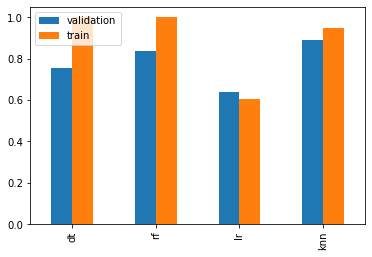

In [376]:
ax = comparison.T.plot.bar()
ax.legend(['validation', 'train'])

- Hyperparameter Tuning
- Model Evaluation

## 5. Predicting The Test Set

In [110]:
testset = pd.read_csv("./data/eeg_test.csv")
X_test = testset

In [107]:
X_test.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4296.41,4040.51,4253.33,4124.10,4341.54,4618.46,4075.38,4601.03,4183.59,4204.10,4197.44,4268.72,4598.46,4342.56
1,4291.28,3994.36,4247.18,4102.56,4328.21,4616.41,4057.44,4622.56,4198.46,4227.69,4190.77,4260.51,4593.33,4337.95
2,4299.49,4019.49,4269.74,4116.41,4344.10,4635.38,4067.18,4627.18,4211.28,4233.33,4202.56,4280.51,4596.92,4350.26
3,4280.00,4004.62,4263.59,4120.51,4323.59,4603.08,4040.51,4589.23,4174.87,4212.82,4192.82,4271.79,4608.72,4344.10
4,4317.44,3968.72,4260.51,4101.54,4341.54,4600.51,4071.28,4607.69,4191.28,4231.28,4199.49,4282.05,4592.31,4372.82


In [109]:
prediction_test = pd.Series(pipeline.predict(X_test))
prediction_test

0        0
1        0
2        0
3        0
4        0
        ..
12887    0
12888    0
12889    0
12890    0
12891    0
Length: 12892, dtype: int64

## 6. Sample Kaggle Submission

You will fit a model on the trainset and make predictions on the testset. 

To submit these predictions to Kaggle you need to write a .csv file with two columns: 
- `index` that matches the `index` column in the test set.
- `label` which is your prediction.

Here is an example predictions file for Kaggle:

In [42]:
sample_kaggle_submission = pd.read_csv("./data/sample_kaggle_submission.csv")

In [44]:
sample_kaggle_submission.head(10)

,label
0,0.168801
1,0.124169
2,0.947757
3,0.069585
4,0.635325
5,0.659027
6,0.653697
7,0.850030
8,0.160489
9,0.843272


This is submitted to the [Kaggle competition website](https://www.kaggle.com/t/09885716fbf14eb08cc1cee2c9ebe7cc) to get an evaluation of your predictions on the public leaderboard.

For the report I want you to write a notebook with a scientific description of your analysis. You have to compare the prediction performance of your two best prediction models. This includes data pre-processing, hyperparameter tuning and model evaluation. I also want you to compare the actual predictions made by each model.

To create a new notebook go the "File" in the menu bar and click "New notebook". Do not forget to save your notebook to your GitHub account. You can create as many notebook as you want, but the final report should be in a notebook with the name "Kaggle_eye_blinking_prediciton.ipynb"

You will be evaluated (equal points) on clarity of the report, scientific insight and complexity of the analysis. 